# Convolutional Neural Network (CNN) for Multiclass Image Classification

### __Importing Packages__

In [81]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

### __Getting The Data - cifar10__

In [19]:
# loading cifar10 dataset from Keras
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# normalizing the data
train_images, test_images = train_images / 255, test_images / 255
# getting class names for the images - https://www.cs.toronto.edu/~kriz/cifar.html
class_names = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [20]:
print(f"Training set: {train_images.shape[0]} images, {train_images.shape[1]}x{train_images.shape[1]} pixels.")
print(f"Test set: {test_images.shape[0]} images, {test_images.shape[1]}x{test_images.shape[1]} pixels.")

Training set: 50000 images, 32x32 pixels.
Test set: 10000 images, 32x32 pixels.


### __Getting a look at the data__

Label: frog


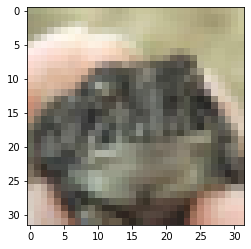

In [21]:
idx = 25
print(f"Label: {class_names[int(train_labels[idx])]}")
plt.imshow(train_images[idx])

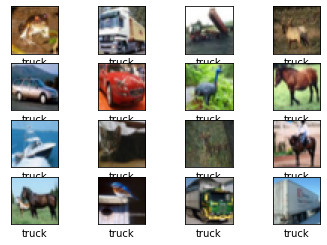

In [22]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[1][0]])
    
plt.show()

### __Building and Training the model__

In [23]:
# Reducing the amount of images fed into the model, for better speed
train_images = train_images[:20000]
train_labels = train_labels[:20000]
test_images = test_images[:4000]
test_labels = test_labels[:4000]

train_images.shape

(20000, 32, 32, 3)

In [48]:
model = models.Sequential()

# 32 neurons, connvolution matrix of 3x3
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax")) # scaling the results

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [49]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
625/625 [==============================] - 13s 20ms/step - loss: 1.7347 - accuracy: 0.3563 - val_loss: 1.4593 - val_accuracy: 0.4692
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 1.3664 - accuracy: 0.5055 - val_loss: 1.2628 - val_accuracy: 0.5403
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 1.2238 - accuracy: 0.5622 - val_loss: 1.2209 - val_accuracy: 0.5640
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 1.1194 - accuracy: 0.6054 - val_loss: 1.1541 - val_accuracy: 0.5918
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 1.0270 - accuracy: 0.6396 - val_loss: 1.2182 - val_accuracy: 0.5770
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.9525 - accuracy: 0.6661 - val_loss: 1.0702 - val_accuracy: 0.6227
Epoch 7/10
625/625 [==============================] - 10s 17ms/step - loss: 0.8952 - accuracy: 0.6848 - val_loss: 1.0790 - val_accuracy:

In [75]:
model.save("images_classifier.model")

INFO:tensorflow:Assets written to: images_classifier.model\assets


### __Model Evaluation__

In [54]:
loss, accuracy = model.evaluate(test_images, test_labels)

print(f"Loss: {round(loss, 4)}")
print(f"Accuracy: {round(accuracy*100, 3)}%")

125/125 [==============================] - 1s 9ms/step - loss: 1.0199 - accuracy: 0.6520
Loss: 1.0199
Accuracy: 65.2%


In [55]:
predictions = model.predict(test_images)

predictions_labels = []

for pred in predictions:
    predictions_labels.append(np.argmax(pred))

cm = confusion_matrix(test_labels, predictions_labels)
cm

array([[227,  16,  21,   8,  16,   4,   3,  11,  68,  15],
       [  6, 308,   1,   2,   4,   2,   2,   1,  17,  49],
       [ 26,   8, 190,  32,  56,  41,  18,  30,  12,  13],
       [  7,  10,  24, 157,  31, 100,  15,  21,  12,  12],
       [  3,   3,  13,  22, 241,  26,  11,  65,  12,   4],
       [  4,   1,  14,  59,  26, 235,   5,  29,   8,   7],
       [  3,   9,  10,  32,  41,  16, 264,   6,   6,   9],
       [  7,   5,   8,  14,  14,  24,   1, 313,   5,   6],
       [  9,  14,   3,   7,   2,   1,   1,   2, 358,  11],
       [  8,  42,   3,   7,   6,   4,   3,  14,  13, 315]], dtype=int64)

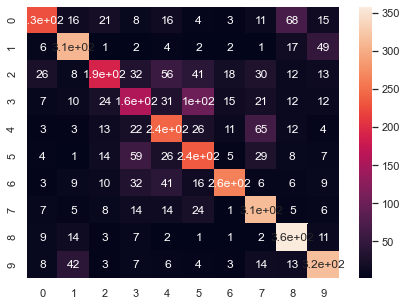

In [85]:
sns.set(rc={'figure.figsize':(7,5)})
cm_plot = sns.heatmap(cm, annot=True)

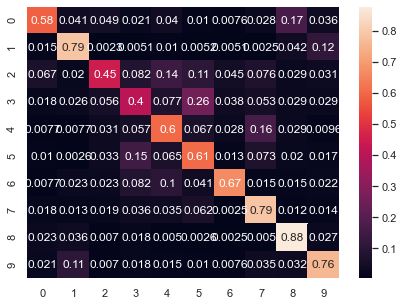

In [86]:
cm_ = cm / cm.astype(np.float).sum(axis=1)
cm_plot_perc = sns.heatmap(cm_, annot=True)


True label: horse
Model Prediction: horse


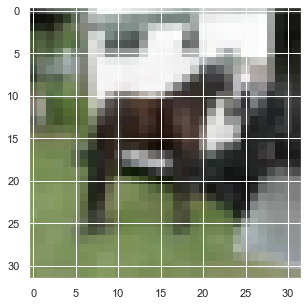


True label: airplane
Model Prediction: bird


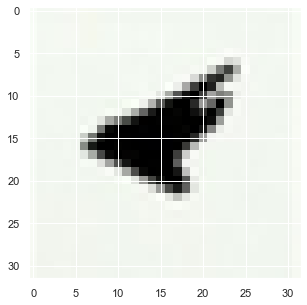


True label: deer
Model Prediction: deer


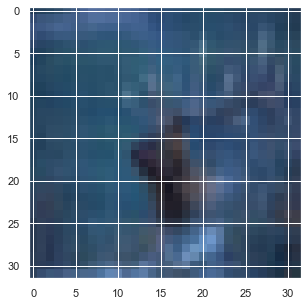


True label: truck
Model Prediction: truck


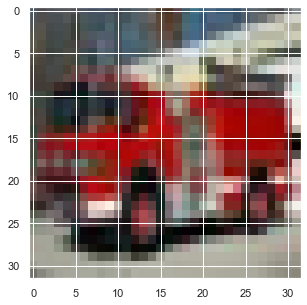


True label: dog
Model Prediction: deer


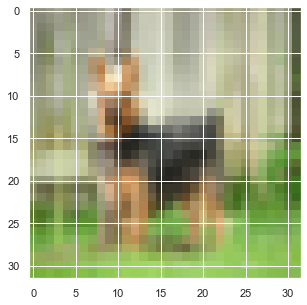


True label: bird
Model Prediction: bird


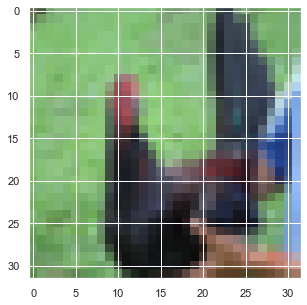


True label: deer
Model Prediction: deer


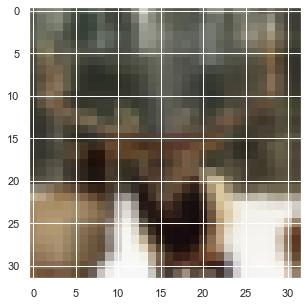


True label: airplane
Model Prediction: airplane


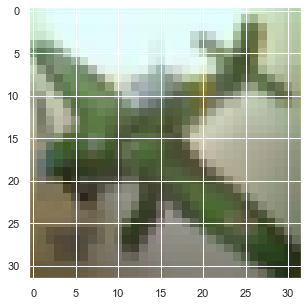


True label: truck
Model Prediction: truck


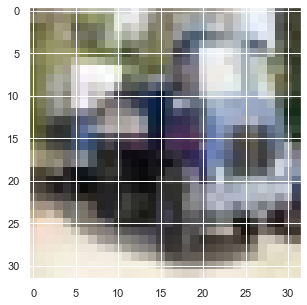


True label: frog
Model Prediction: frog


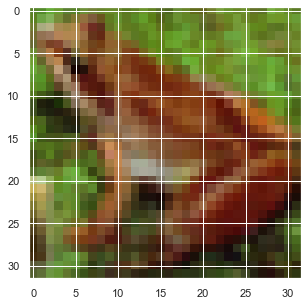


True label: frog
Model Prediction: frog


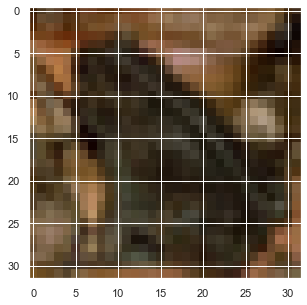

In [88]:
for i in range(20,31):
    idx = i
    pic = test_images[idx]
    plt.imshow(pic)
    prediction = model.predict(np.array([pic]))
    index = np.argmax(prediction) # index of maximum value with argmax
    print(f"\nTrue label: {class_names[int(test_labels[idx])]}")
    print(f"Model Prediction: {class_names[index]}")
    plt.show()

### __Testing the model on Images taken from the internet__

In [89]:
model = models.load_model("images_classifier.model")

In [90]:
images_dic = {"deer.jpg": "deer",
             "horse.jpg": "horse",
             "horse2.jpg": "horse",
             "pegasus.jpg": "pegasus",
             "plane.jpg": "airplane"}


True Label: deer
Model Prediction: deer.


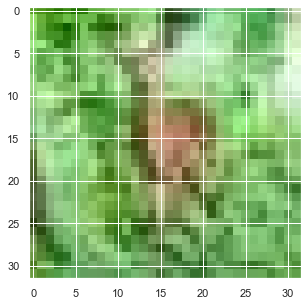


True Label: horse
Model Prediction: dog.


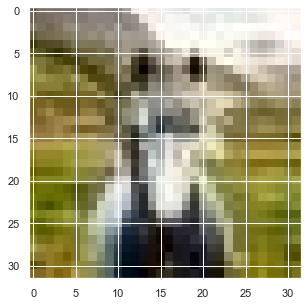


True Label: horse
Model Prediction: horse.


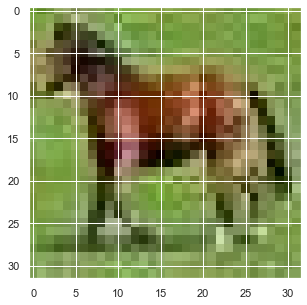


True Label: airplane
Model Prediction: airplane.


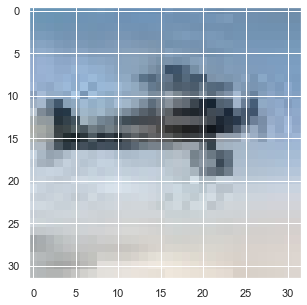

In [95]:
for pic in list(images_dic.keys()-["pegasus.jpg"]):
    img = cv.imread(pic) # load in bgr colour scheme
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # convert colour scheme to to RGB
    plt.imshow(img, cmap=plt.cm.binary)
    prediction = model.predict(np.array([img]) / 255)
    index = np.argmax(prediction)
    print(f"\nTrue Label: {images_dic[pic]}")
    print(f"Model Prediction: {class_names[index]}.")
    plt.show()

### __Just for fun, let's see what the model predicts when when given with a picture of a pegasus__
Original Photo: https://pixabay.com/photos/horse-pegasus-archway-fantasy-3395135/

True Label: pegasus
Prediction is airplane.


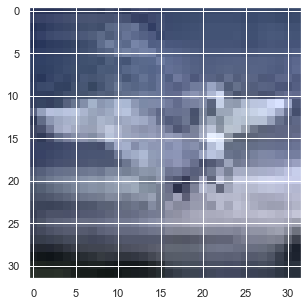

In [99]:
img = cv.imread("pegasus.jpg") 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(img, cmap=plt.cm.binary)
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"True Label: {images_dic['pegasus.jpg']}")
print(f"Prediction is {class_names[index]}.")

### __References__
* https://www.youtube.com/watch?v=t0EzVCvQjGE
* https://www.cs.toronto.edu/~kriz/cifar.html